In [2]:
# Importer les librairies et les données 
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import spacy
import seaborn as sns
from collections import Counter

nlp = spacy.load("fr_core_news_sm")


In [4]:
dataM = pd.read_csv("montree_SitEmo_lemma.csv")
print(len(dataM))
colonnes = dataM[["Corpus","Id_aa","Nom_aa","Id_phrase","Texte_phrase","Id_SitEmo","Auteur_SitEmo","Texte_SitEmo","Nature_SitEmo","Declencheur_entier","Mode","Type1","Type2","Cat1","Cat2","Lemmes_declencheurs","Lemmes_SitEmo"]]


545


In [3]:
data = pd.read_csv("TOTAL_SitEmo_lemma.csv")
print(len(data))
colonnes = data[["Corpus","Id_aa","Nom_aa","Id_phrase","Texte_phrase","Id_SitEmo","Auteur_SitEmo","Texte_SitEmo","Nature_SitEmo","Declencheur_entier","Mode","Type1","Type2","Cat1","Cat2","Lemmes_declencheurs","Lemmes_SitEmo"]]


5908


In [5]:
# liste des Modes  
list_modes = data["Mode"].drop_duplicates().to_list()
print(f"Voilà la liste des modes d'expressions des émotions : {list_modes}")

# Nombre de Montree
montree = data[data["Mode"] == "Montree"]
print(f"Le corpus contient {len(montree)} SitEmo de types : émotions montrées.")

Voilà la liste des modes d'expressions des émotions : ['Comportementale', 'Designee', 'Suggeree', 'Montree']
Le corpus contient 545 SitEmo de types : émotions montrées.


In [6]:
# liste des natures
list_natures = data["Nature_SitEmo"].drop_duplicates().to_list()
print(f"Voilà la liste des natures des SitEmo : {list_natures}")

Voilà la liste des natures des SitEmo : ['Proposition', 'SN', 'SAdj', 'SPrep', 'SAdv', 'Conj. de coordination', 'Accumulation', 'Interjection', 'Enonce exclamatif', 'Enonce averbal', 'Autre', 'Conj. de subordination', 'Enonce clive', 'Points de suspension', 'Dislocation gauche', 'Dislocation droite']


In [7]:
lst_nbr_modes = [(mode,len(data.query("`Mode` == @mode"))) for mode in list_modes]

print(f"Liste de tuples des codes et du nombre d'article : {lst_nbr_modes}")

Liste de tuples des codes et du nombre d'article : [('Comportementale', 1444), ('Designee', 1682), ('Suggeree', 2237), ('Montree', 545)]


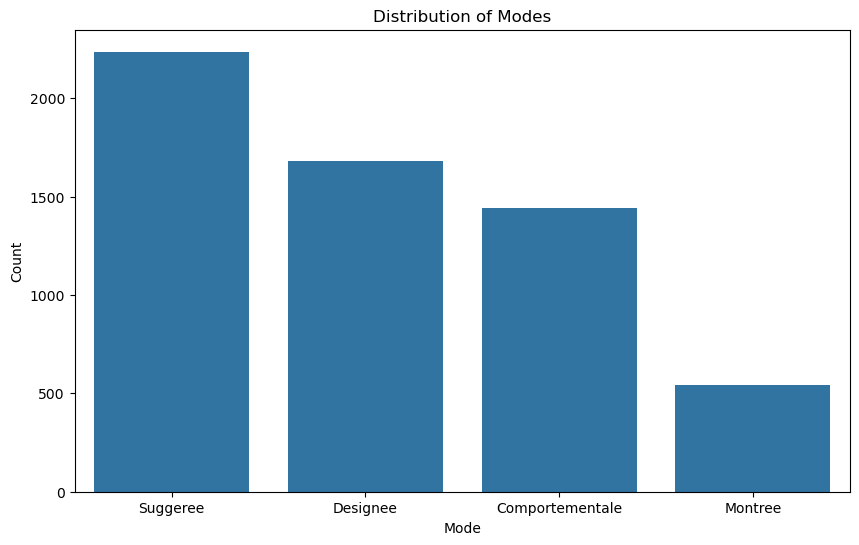

In [8]:
# Count the occurrences of each Mode
mode_counts = data['Mode'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=mode_counts.index, y=mode_counts.values)
plt.title('Distribution of Modes')
plt.xlabel('Mode')
plt.ylabel('Count')
plt.show()

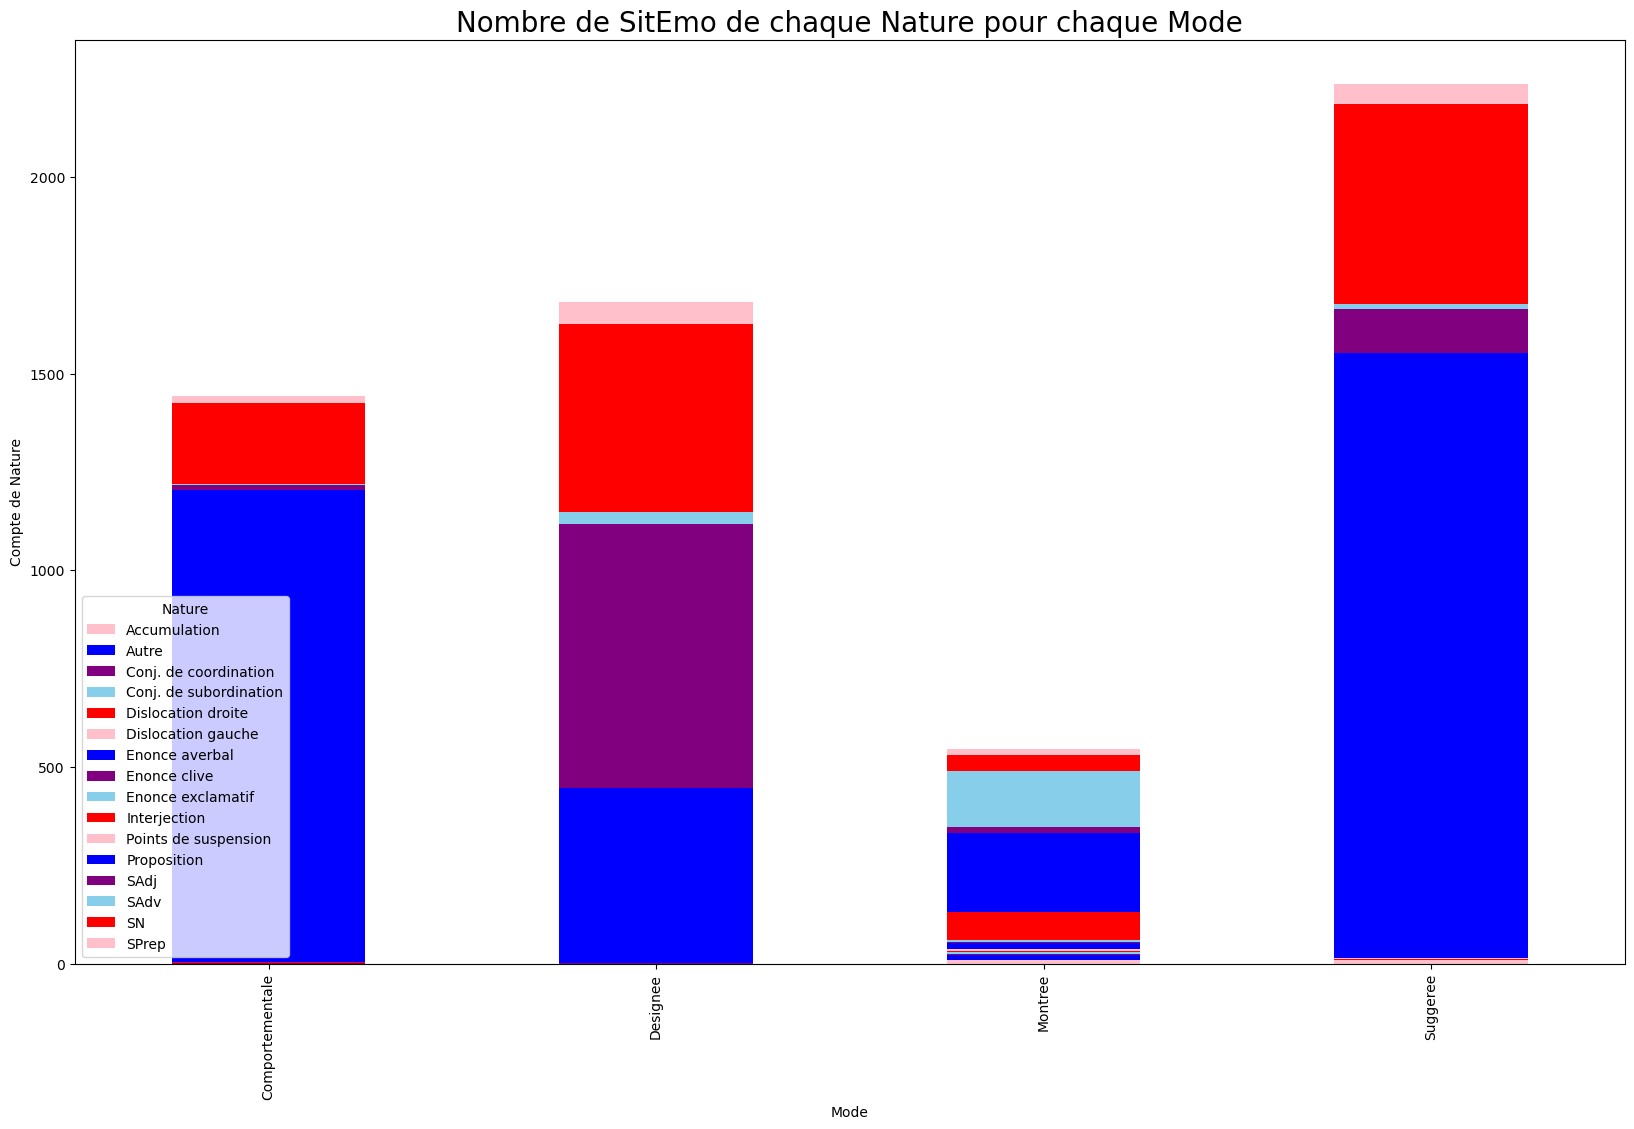

In [7]:
counts = colonnes.groupby(['Mode', 'Nature_SitEmo']).size().unstack(fill_value=0)

counts.plot(kind='bar', stacked=True, figsize=(20, 12), color =["pink", "blue", "purple", "skyblue", "red"])
plt.xlabel('Mode')
plt.ylabel('Compte de Nature')
plt.title('Nombre de SitEmo de chaque Nature pour chaque Mode', fontsize = 20)
plt.legend(title='Nature')
plt.show()

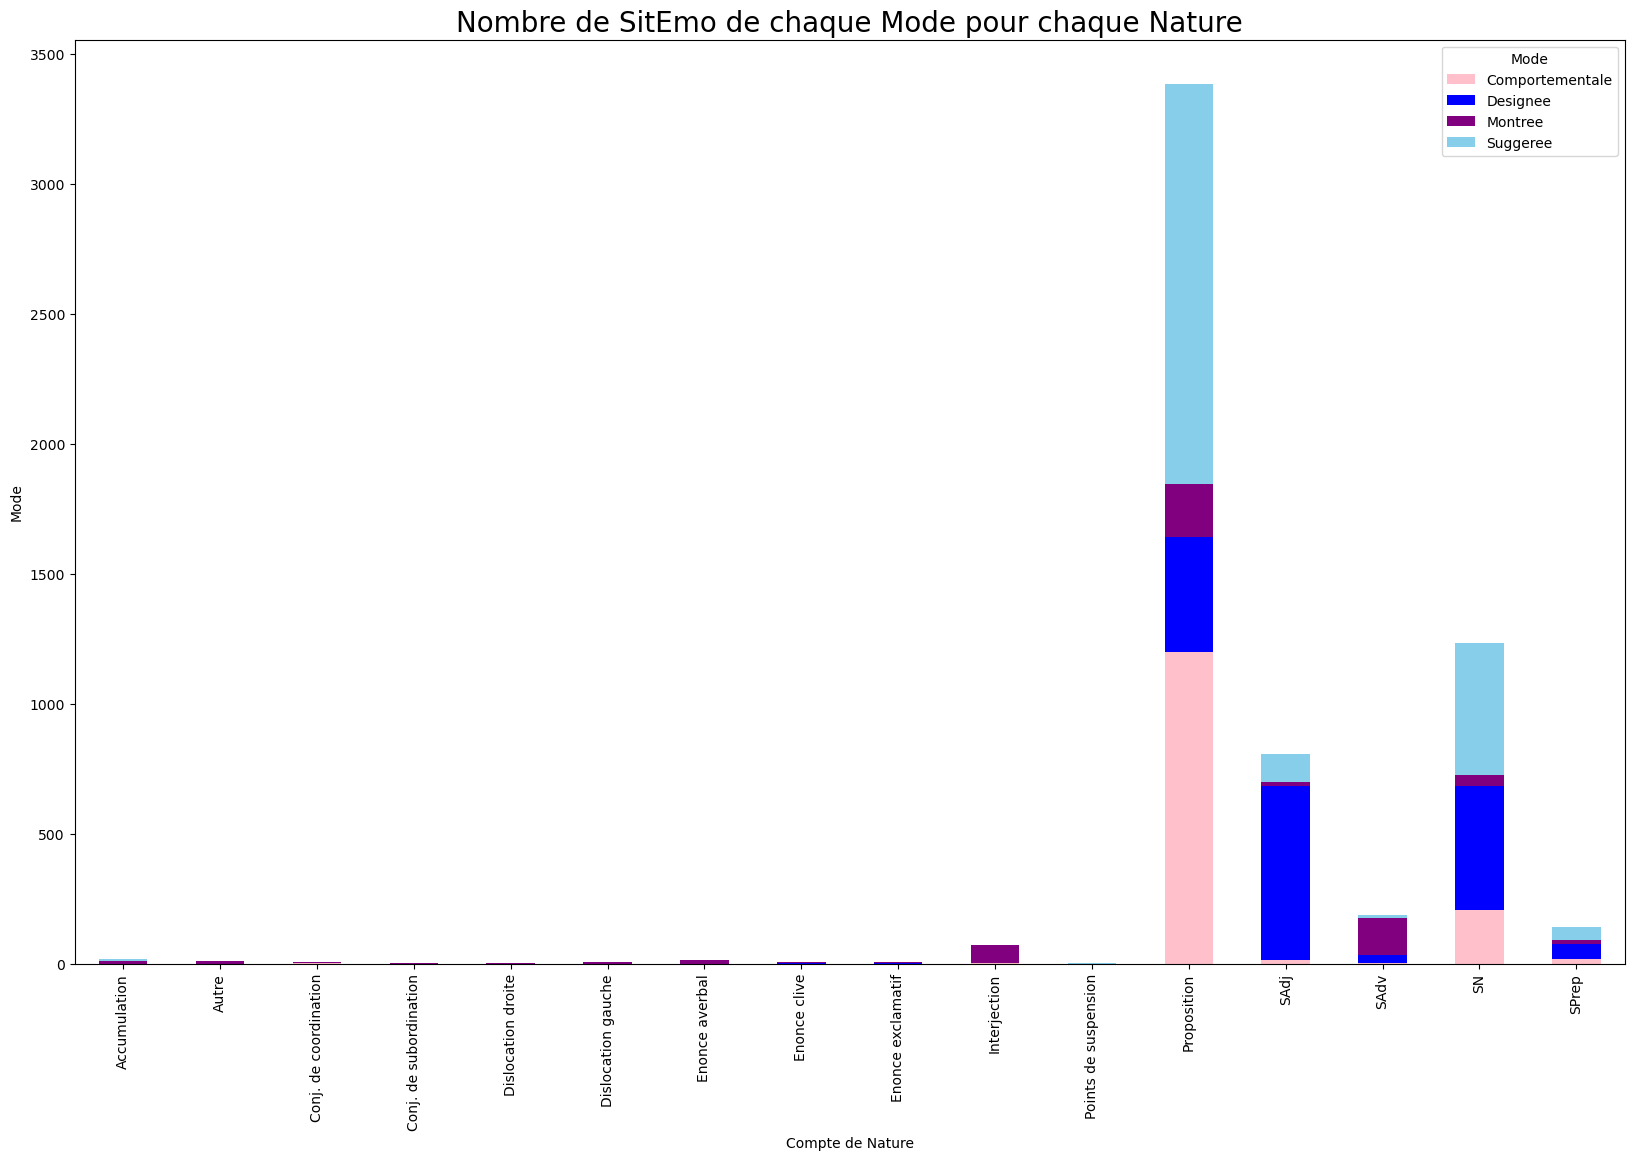

In [8]:
counts = colonnes.groupby(['Nature_SitEmo', 'Mode']).size().unstack(fill_value=0)

counts.plot(kind='bar', stacked=True, figsize=(20, 12), color =["pink", "blue", "purple", "skyblue", "red"])
plt.xlabel('Compte de Nature')
plt.ylabel('Mode')
plt.title('Nombre de SitEmo de chaque Mode pour chaque Nature', fontsize = 20)
plt.legend(title='Mode')
plt.show()

/tmp/ipykernel_4991/1885813399.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nature_counts.index, y=nature_counts.values, palette='plasma')


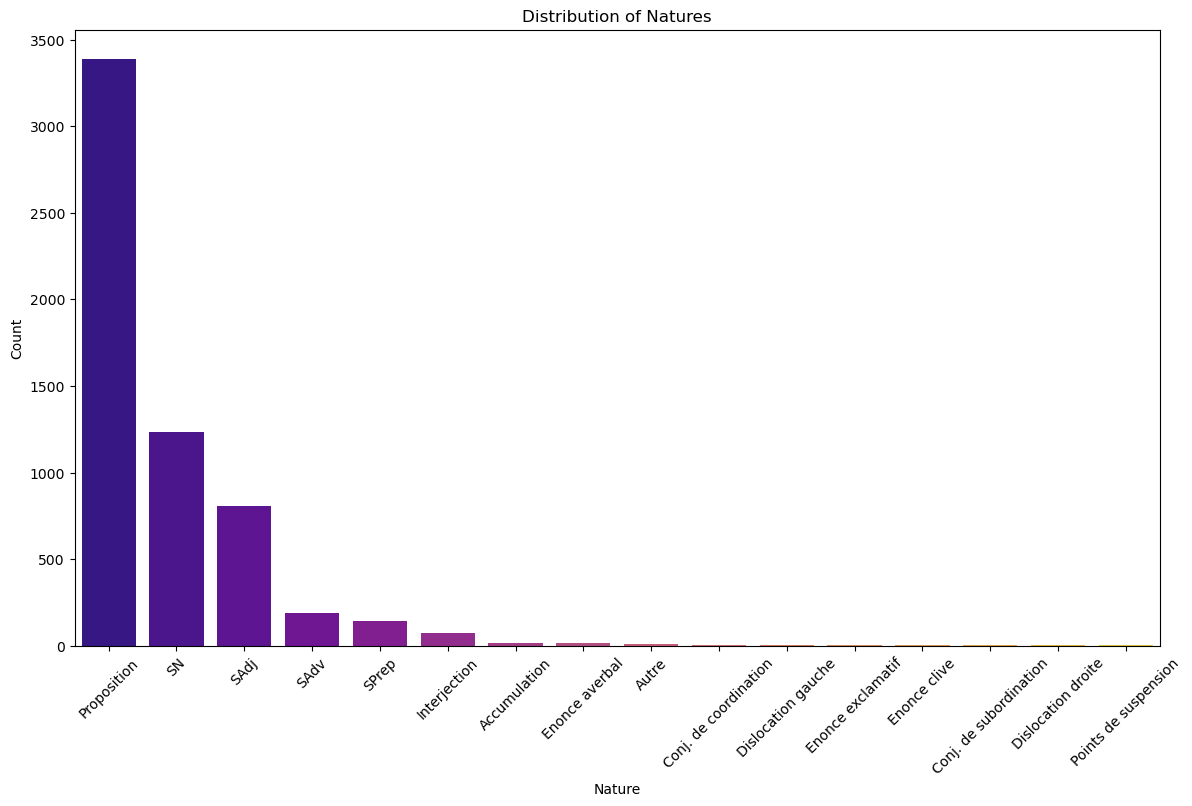

In [9]:
# Count the occurrences of each Nature
nature_counts = data['Nature_SitEmo'].value_counts()

# Plot the bar chart
plt.figure(figsize=(14, 8))
sns.barplot(x=nature_counts.index, y=nature_counts.values, palette='plasma')
plt.title('Distribution of Natures')
plt.xlabel('Nature')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

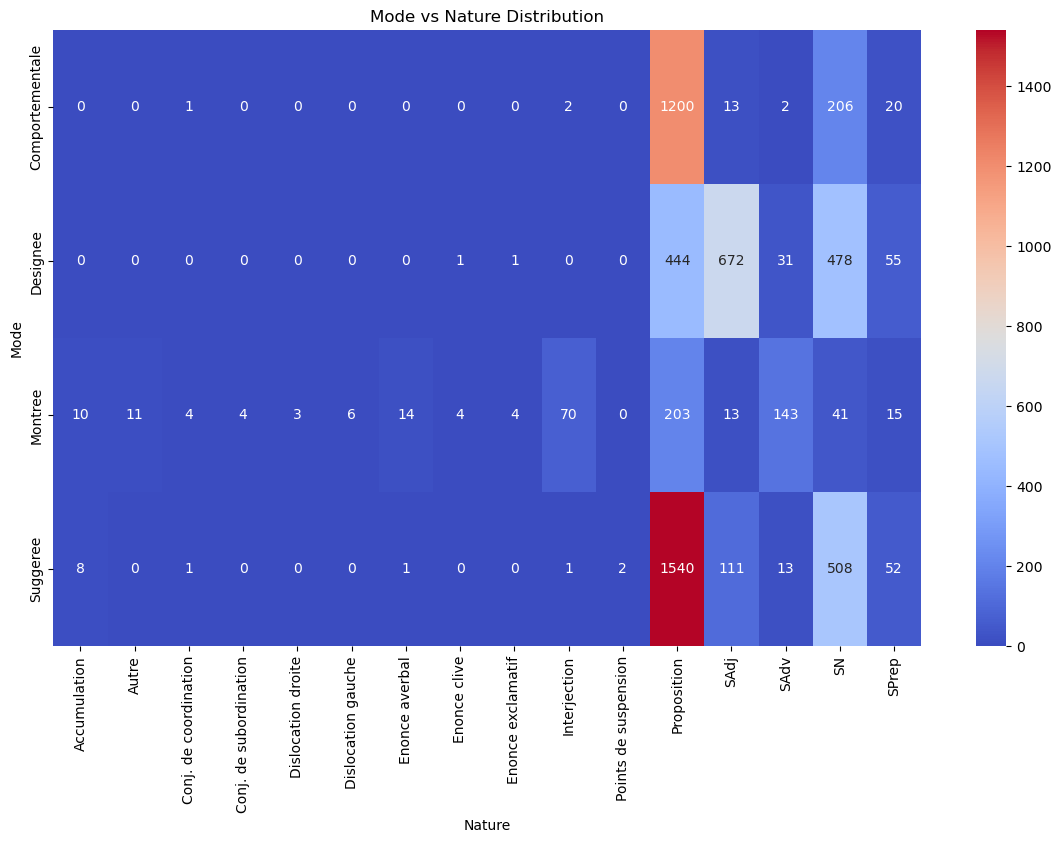

In [10]:
# Create a crosstab to count the occurrences of each Mode-Nature combination
crosstab = pd.crosstab(data['Mode'], data['Nature_SitEmo'])

# Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(crosstab, annot=True, cmap='coolwarm', fmt='d')
plt.title('Mode vs Nature Distribution')
plt.xlabel('Nature')
plt.ylabel('Mode')
plt.show()

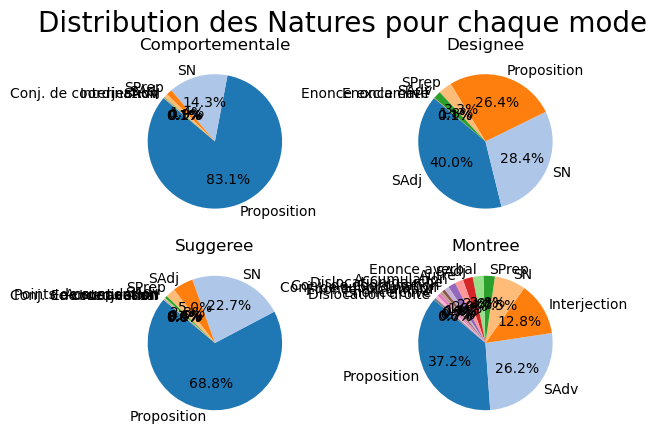

In [11]:
for i, mode in enumerate(list_modes, 1): 
    mode_data = data[data['Mode'] == mode]
    
    # Count occurrences of each Nature
    nature_counts = mode_data['Nature_SitEmo'].value_counts()
    
    # Plot a pie chart
    plt.subplot(2, 2, i) 
    plt.pie(nature_counts, labels=nature_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
    plt.suptitle('Distribution des Natures pour chaque mode', fontsize = 20)
    plt.title(f'{mode}')

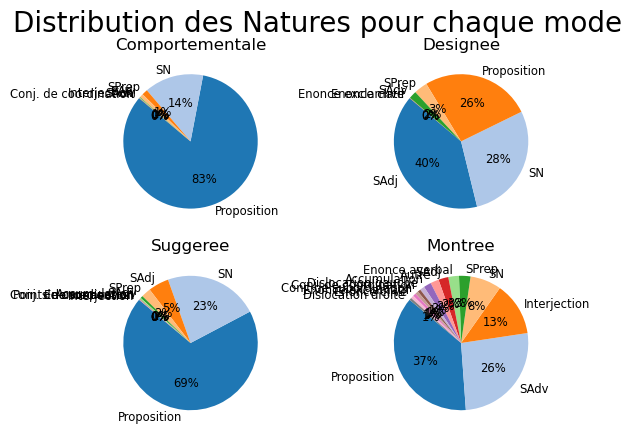

In [16]:
for i, mode in enumerate(list_modes, 1): 
    mode_data = data[data['Mode'] == mode]
    
    # Count occurrences of each Nature
    nature_counts = mode_data['Nature_SitEmo'].value_counts()
    
    # Plot a pie chart
    plt.subplot(2, 2, i) 
    plt.pie(nature_counts, labels=nature_counts.index,  autopct='%.0f%%', textprops={'size': 'smaller'}, radius=1, startangle=140, colors=plt.cm.tab20.colors)
    plt.suptitle('Distribution des Natures pour chaque mode', fontsize = 20)
    plt.title(f'{mode}')

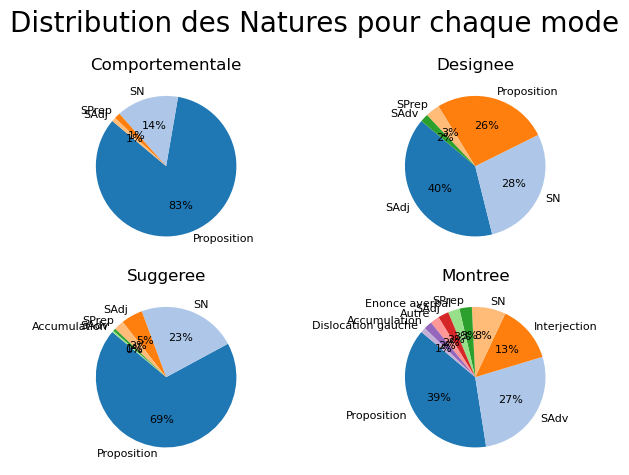

In [46]:
for i, mode in enumerate(list_modes, 1): 
    mode_data = data[data['Mode'] == mode]
    
    # Count occurrences of each Nature
    nature_counts = mode_data['Nature_SitEmo'].value_counts()
    nature_counts = nature_counts[nature_counts>5]
    # Plot a pie chart
    if not nature_counts.empty:
        plt.subplot(2, 2, i) 
        plt.pie(nature_counts, labels=nature_counts.index,  autopct='%.0f%%',  startangle=140, textprops={"fontsize":8}, colors=plt.cm.tab20.colors)
        plt.suptitle('Distribution des Natures pour chaque mode', fontsize = 20)
        plt.title(f'{mode}')
plt.tight_layout()
plt.show()